In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
N = 1000

Будем выбирать параметры случайно из Бета распределения с параметрами 1.5 и 2.

In [3]:
beta_rv = sts.beta(1.5, 2)

# Биномиальное распределение

Сгенерируем выборку размера 1000 из биномиального распределения с $m = 50$, а $p$ выберем случайно из нашего Бета распределения.

In [4]:
m = 50
p = beta_rv.rvs(1)[0]
binom_rv = sts.binom(m, p)
binom_sample = binom_rv.rvs(N)

In [5]:
K = 500

Напишем функцию, которая будет считать бутстрепную оценку дисперсии для биномиального распределения, которая на вход принимает оценку, размер бутстрепной выборки и функцию, считающую оценку параметра для каждой бутстрепной выборки. Бутсреп параметрический, количесвто бутстрепных выборок $K = 500$, размер бутстрепной выборки равен $n$.

In [6]:
def GetVarianceParamBinom(estimator, n, estimator_function):
    bootstrap_estimators = np.zeros(K)
    binom_rv = sts.binom(m, estimator)
    bootstrap_param_samples = binom_rv.rvs((K, n))
    for k in range(K):
        bootstrap_estimators[k] = estimator_function(bootstrap_param_samples[k]) / m
    return np.mean(bootstrap_estimators ** 2) - np.mean(bootstrap_estimators) ** 2

Для каждого $n \leqslant N$ посчитаем эффективную оценку биномиального распределения, которая равна $\frac{\overline{X}}{m}$, а также бутстрепную оценку дисперсии для этой эффективной оценки.

In [7]:
bootstrap_variance_estimators_mean = np.zeros(N)
for n in range(N):
    effective_estimator = np.mean(binom_sample[:n + 1]) / m
    bootstrap_variance_estimators_mean[n] = GetVarianceParamBinom(effective_estimator,
                                                                  n + 1, np.mean)

Также для каждого $n \leqslant N$ посчитаем несмещенную оценку $\frac{X_1}{m}$ и ее бутстрепную оценку дисперсии.

In [12]:
bootstrap_variance_estimators_first = np.zeros(N)
for n in range(N):
    effective_estimator = np.min(binom_sample[:n + 1]) / m
    bootstrap_variance_estimators_first[n] = GetVarianceParamBinom(effective_estimator, 
                                                                   n + 1, 
                                                                   lambda sample: \
                                                                   sample[0])

Построим график зависимости бутсрепной оценки дисперсии для данных двух оценок, а также нарисуем величину $\frac{1}{I_X(p)} = \frac{p (1 - p)}{n m}$, которая является нижней оценкой значения дисперсии для наилучшей оценки в среднеквадратичном подходе в классе всех несмещенных оценок, это следует из неравенства Рао-Крамера: $\frac{1}{I_X(p)} \leqslant D_{p}\hat{p}(X)$, где $\hat{p}(X)$ - оценка параметр $p$.

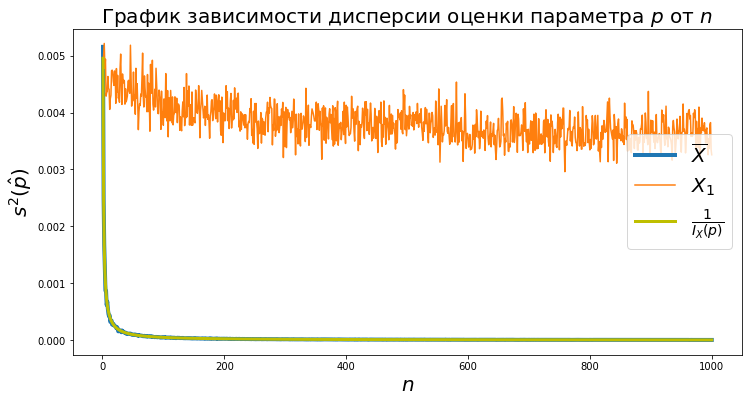

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, N + 1), bootstrap_variance_estimators_mean, 
         label=r"$\overline{X}$", linewidth=4)
plt.plot(range(1, N + 1), bootstrap_variance_estimators_first, label=r"$X_1$")
plt.plot(range(1, N + 1), [p * (1 - p) / n / m  for n in range(1, N + 1)], 
         label=r"$\frac{1}{I_X(p)}$", color='y', linewidth=3)
plt.title(r"График зависимости дисперсии оценки параметра $p$ от $n$", fontsize=20)
plt.xlabel(r"$n$", fontsize=20)
plt.ylabel(r"$s^2(\hat{p})$", fontsize=20)
plt.legend(loc='right', fontsize=20);

$\textbf{Вывод:}$ Как видно из графика бутстрепная оценка дисперсии оценки $\overline{X}$ совпадает с обратной к информации Фишера величиной, что и подтверждает то, что данная оценка является эффективной оценкой параметра $p$, что было доказано на семинаре. Кроме того, дисперсия другой несмещенной оценки $X_1$ оказалась больше чем $\frac{1}{I_X(p)}$, что подтверждает на практике выполнение неравенства Крамера-Рао.

# Нормальное распределение

Возьмем параметр $\sigma^2$ равным 2.1, а параметр $a$ выберем случайно из нашего Бета распределения и создадим выборку с данными параметрами размера $N$.

In [113]:
a = beta_rv.rvs(1)[0]
sigma = 2.1
norm_rv = sts.norm(a, sigma ** 0.5)
norm_sample = norm_rv.rvs(N)

Аналогично биномиальному распределению посчитаем бутстрепную оценку дисперсии оценок $\overline{X}$ и медианы $\hat{\mu}$ параметра $a$.

In [114]:
def GetVarianceParamNorm(estimator, n, estimator_function):
    bootstrap_estimators = np.zeros(K)
    norm_rv = sts.norm(estimator, sigma ** 0.5)
    bootstrap_param_sample = norm_rv.rvs((K, n))
    for k in range(K):
        bootstrap_estimators[k] = estimator_function(bootstrap_param_sample[k])
    return np.mean(bootstrap_estimators ** 2) - \
            np.mean(bootstrap_estimators) ** 2

In [115]:
bootstrap_variance_estimators_mean = np.zeros(N)
for n in range(N):
    effective_estimator = np.mean(norm_sample[:n + 1])
    bootstrap_variance_estimators_mean[n] = GetVarianceParamNorm(effective_estimator, 
                                                                 n + 1, np.mean)

In [116]:
bootstrap_variance_estimators_median = np.zeros(N)
for n in range(N):
    effective_estimator = np.median(norm_sample[:n + 1])
    bootstrap_variance_estimators_median[n] = GetVarianceParamNorm(effective_estimator, 
                                                                   n + 1, np.median)

Построим график зависимости дисперсии оценок $\overline{X}$ и $\hat{\mu}$ параметра $a$ от размера выборки. А также нарисуем величину $\frac{1}{I_X(a)}$ равную $\frac{\sigma^2}{n}$.

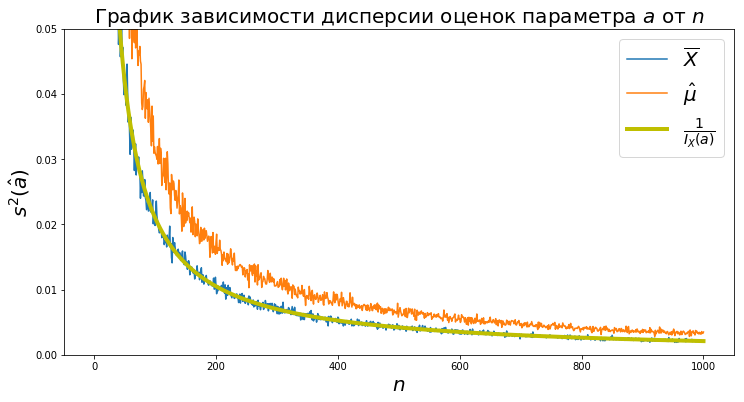

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, N + 1), bootstrap_variance_estimators_mean, 
         label=r"$\overline{X}$")
plt.plot(range(1, N + 1), bootstrap_variance_estimators_median, 
         label=r"$\hat{\mu}$")
plt.plot(range(1, N + 1), [sigma / n for n in range(1, N + 1)], 
         label=r"$\frac{1}{I_X(a)}$", linewidth=4, color='y')
plt.title(r"График зависимости дисперсии оценок параметра $a$ от $n$", fontsize=20)
plt.xlabel(r"$n$", fontsize=20)
plt.ylabel(r"$s^2(\hat{a})$", fontsize=20)
plt.ylim(0, 0.05)
plt.legend(loc='best', fontsize=20);

$\textbf{Вывод:}$ Как видно из графика, аналогично биномиальному распределению мы убедились в том, что оценка $\overline{X}$ является эффективной оценкой парамтер $a$, а также, что для другой несмещенной оценки $\hat{\mu}$ значение ее дисперсии оказывается большим, чем значение $\frac{1}{I_X(a)}$.

# Экспоненциальное распределение

Выберем параметр $\theta$ случайным образом из нашего Бета распределения и создадим выборку рамзера $N$ из экспоненциального распределения с параметром $\theta$.

In [136]:
theta = beta_rv.rvs(1)[0]
expon_rv = sts.expon(scale = 1 / theta)
expon_sample = expon_rv.rvs(N)

На семинаре было доказано, что эффективные оценки существуют только для $\tau(\theta) = \frac{a}{\theta} + b$, поэтому в данном случае будем оценивать значение $\frac{1}{\theta}$. Тогда по неравенству Крамера-Рао для несмещенной оценки $\theta^*(X)$ для $\tau(\theta)$ для любого $\theta$ выполнено: 
$$\frac{(\tau'(\theta))^2}{I_X(\theta)} \leqslant D_{\theta}\theta^*.$$
В нашем случае $(\tau'(\theta))^2 = \frac{1}{\theta^4}$, $I_X(\theta) = \frac{n}{\theta^2}$, поэтому получаем, что:
$$\frac{1}{\theta^2} \leqslant  D_{\theta}\theta^*.$$

Посчитаем бутстрепную оценку дисперсии оценки $\overline{X}$ параметра $\frac{1}{\theta}$.

In [137]:
def GetVarianceParamExpon(estimator, n):
    bootstrap_estimators = np.zeros(K)
    param_expon_rv = sts.expon(scale = estimator)
    bootstrap_param_samples = param_expon_rv.rvs((K, n))
    for k in range(K):
        bootstrap_estimators[k] = np.mean(bootstrap_param_samples[k])
    return np.mean(bootstrap_estimators ** 2) - \
            np.mean(bootstrap_estimators) ** 2

In [138]:
bootstrap_variance_estimators_mean = np.zeros(N)
for n in range(N):
    effective_estimator = np.mean(expon_sample[:n + 1])
    bootstrap_variance_estimators_mean[n] = GetVarianceParamExpon(effective_estimator,
                                                                  n + 1)

Также посчитаем для оценки $\frac{n \overline{X}}{n - 1}$.

In [139]:
def GetVarianceParamExponNotEffective(estimator, n):
    bootstrap_estimators = np.zeros(K)
    expon_rv = sts.expon(scale = estimator)
    bootstrap_param_sample = expon_rv.rvs((K, n))
    for k in range(K):
        bootstrap_estimators[k] = n / (n - 1) * np.mean(bootstrap_param_sample[k])
    return np.mean(bootstrap_estimators ** 2) - np.mean(bootstrap_estimators) ** 2

In [140]:
bootstrap_variance_estimators_not_effective = np.zeros(N - 1)
for n in range(1, N):
    estimator = (n + 1) / n * np.mean(expon_sample[:n + 1]) 
    bootstrap_variance_estimators_not_effective[n - 1] = \
    GetVarianceParamExponNotEffective(estimator, n + 1)

Нарисуем график зависимости дисперсии оценок $\overline{X}$ и $\frac{n \overline{X}}{n - 1}$ параметра $\frac{1}{\theta}$ от размера выборки. А также нарисуем величину $\frac{(\tau'(\theta))^2}{I_X(a)}$ равную $\frac{1}{n \theta^2}$.

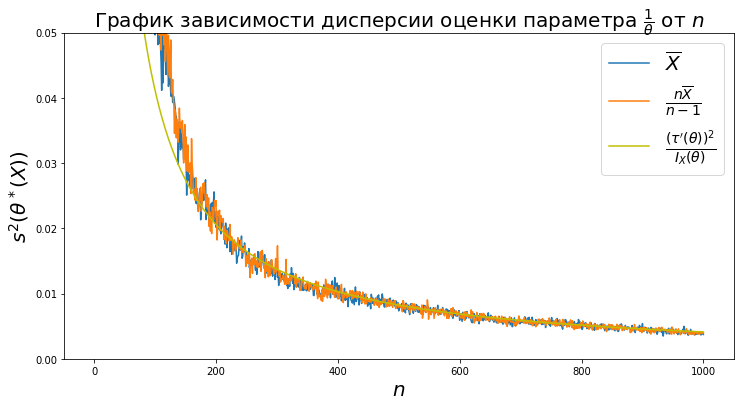

In [141]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, N + 1), bootstrap_variance_estimators_mean, label=r"$\overline{X}$")
plt.plot(range(2, N + 1), bootstrap_variance_estimators_not_effective,
         label=r"$\frac{n \overline{X}}{n - 1}$")
plt.plot(range(1, N + 1), [1 / (theta ** 2) / n for n in range(1, N + 1)], 
         label=r"$\frac{(\tau'(\theta))^2}{I_X(\theta)}$", color='y')
plt.title(r"""График зависимости дисперсии оценки 
            параметра $\frac{1}{\theta}$ от $n$""", fontsize=20)
plt.xlabel(r"$n$", fontsize=20)
plt.ylabel(r"$s^2(\theta^*(X))$", fontsize=20)
plt.ylim(0, 0.05)
plt.legend(loc='best', fontsize=20);

$\textbf{Вывод:}$ Как видно из графика, мы убедились в том, что оценка $\overline{X}$ является эффективной оценкой параметра $\frac{1}{\theta}$, а также, что для оценки $\frac{n \overline{X}}{n - 1}$, ее значение дисперсии почти не отличается от эффективной оценки, так как в пределе данная оценка стремится к эффективной при увеличении выборки. Тем не менее оценка $\frac{n \overline{X}}{n - 1}$ не является несмещенной, следовательно для нее не обязательно выполнение неравенства Крамера-Рао, так как данное неравенство работает только в случае несмещеннных оценок.

$\textbf{Общий вывод:}$ Мы убедились, что во всех трех случаях неравенство Крамера-Рао выполняется и в случае эффективной оценки действительно выполняется равенство. Кроме того, если оценка не является несмещенной, то ее дисперсия может оказаться ниже, чем нижняя оценка в неравенстве Крамера-Рао, так как данное неравенство работает только для несмещенных оценок.